# Розрахунок середньої об'ємної теплоємності газової суміші при зміні складу та температури

## 1. Постановка задачі

Визначити середню об'ємну теплоємність газової суміші, яка змінює свій склад та температуру з часом. Початковий склад суміші: CO - 87.4%, CO₂ - 10.1%, O₂ - 1.6%, N₂ - 0.9% при температурі 100°С. Простежити зміну теплоємності протягом 11 кроків по 10 хвилин, враховуючи зміну як складу, так і температури.

Для розв'язання задачі будемо використовувати:

1. Формули розрахунку мольних теплоємностей газів при сталому тиску на основі табличних коефіцієнтів
2. Формули перетворення мольних теплоємностей в об'ємні
3. Адитивне правило для визначення середньої об'ємної теплоємності суміші
4. Врахування зміни температури на кожному кроці

## 2. Теоретичні відомості про теплоємність та її температурну залежність

### 2.1. Залежність теплоємності від температури

Теплоємність газів залежить від температури нелінійно. Для визначення мольної теплоємності при сталому тиску $c_p$ використовується емпірична формула:

$$c_p = a + b \cdot T + \frac{c}{T^2}$$

де:
- $a$, $b$, $c$ - емпіричні коефіцієнти, індивідуальні для кожного газу
- $T$ - абсолютна температура, К

Об'ємна теплоємність $c_{p,v}$ розраховується через мольну з урахуванням об'єму:

$$c_{p,v} = \frac{c_p}{V_m}$$

де $V_m$ - мольний об'єм газу при заданих температурі й тиску.

### 2.2. Вплив складу суміші на теплоємність

Середня теплоємність суміші за адитивним правилом розраховується як сума добутків теплоємностей компонентів на їх об'ємні частки:

$$c_{p,mix} = \sum_{i=1}^n r_i \cdot c_{p,i}$$

де:
- $r_i$ - об'ємна частка i-го компонента
- $c_{p,i}$ - теплоємність i-го компонента
- $n$ - кількість компонентів

## 3. Вхідні дані

### 3.1. Склад газової суміші на кожному кроці (об'ємні %)

| Крок | Час, хв | CO, % | CO₂, % | O₂, % | N₂, % |
|:----:|:-------:|:-----:|:------:|:-----:|:-----:|
|  0   |    0    | 87.4  |  10.1  |  1.6  |  0.9  |
|  1   |   10    | 87.1  |  10.6  |  1.4  |  0.8  |
|  2   |   20    | 82.7  |  15.2  |  1.3  |  0.8  |
|  3   |   30    | 77.6  |  20.6  |  1.1  |  0.7  |
|  4   |   40    | 73.5  |  25.0  |  0.9  |  0.6  |
|  5   |   50    | 67.3  |  31.5  |  0.7  |  0.5  |
|  6   |   60    | 55.5  |  43.5  |  0.6  |  0.4  |
|  7   |   70    | 40.1  |  59.1  |  0.5  |  0.3  |
|  8   |   80    | 25.9  |  73.4  |  0.4  |  0.3  |
|  9   |   90    | 20.3  |  79.2  |  0.3  |  0.2  |
|  10  |   100   | 12.5  |  87.1  |  0.2  |  0.2  |
|  11  |   110   |  8.8  |  91.0  |  0.1  |  0.1  |

### 3.2. Температура на кожному кроці (°C)

| Крок | Час, хв | Температура, °C |
|:----:|:-------:|:---------------:|
|  0   |    0    |       100       |
|  1   |   10    |       110       |
|  2   |   20    |       123       |
|  3   |   30    |       136       |
|  4   |   40    |       141       |
|  5   |   50    |       154       |
|  6   |   60    |       168       |
|  7   |   70    |       152       |
|  8   |   80    |       143       |
|  9   |   90    |       131       |
|  10  |   100   |       120       |
|  11  |   110   |       110       |

### 3.3. Коефіцієнти для розрахунку теплоємності газів

| Газ | a (кал/(моль·К)) | b·10³ (кал/(моль·К²)) | c·10⁻⁵ (кал·К/моль) |
|:---:|:----------------:|:---------------------:|:-------------------:|
| CO  |       6.79       |         0.98          |        -0.11        |
| CO₂ |      10.55       |         2.16          |        -2.04        |
| O₂  |       7.16       |         1.0           |        -0.4         |
| N₂  |       6.66       |         1.02          |          0          |

In [1]:
"""
Розрахунок зміни середньої об'ємної теплоємності газової суміші при зміні складу.
Склад газу на кожному кроці задається окремими списками для кожного компоненту.
"""

import matplotlib.pyplot as plt

# Константи
R = 8.31446261815  # Дж/(моль·К)
CAL_TO_JOULE = 4.1868  # Дж/кал
P_STANDARD = 101325  # Па (1 атм)
T_STANDARD = 273.15  # К (0°C)

# Коефіцієнти для газів (в кал/(моль·К))
# CO
a_co = 6.79
b_co = 0.98e-3  # Коефіцієнт b·10³ з таблиці
c_co = -0.11*1e5  # Множимо на 1e5 згідно з таблицею

# CO₂
a_co2 = 10.55
b_co2 = 2.16e-3
c_co2 = -2.04*1e5

# O₂
a_o2 = 7.16
b_o2 = 1.0e-3
c_o2 = -0.4*1e5

# N₂
a_n2 = 6.66
b_n2 = 1.02e-3
c_n2 = 0  # для N₂ немає коефіцієнта c

In [2]:
# Функція для розрахунку середньої об'ємної теплоємності суміші
def calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius):
    """
    Розраховує середню об'ємну теплоємність газової суміші з вказаним складом
    при заданій температурі.

    Parameters:
    r_co (float): Об'ємна частка CO
    r_co2 (float): Об'ємна частка CO₂
    r_o2 (float): Об'ємна частка O₂
    r_n2 (float): Об'ємна частка N₂
    t_celsius (float): Температура, °C

    Returns:
    float: Середня об'ємна теплоємність суміші, кДж/(м³·К)
    """
    # Перевірка суми часток
    total_fraction = r_co + r_co2 + r_o2 + r_n2
    if abs(total_fraction - 1.0) > 1e-10:
        raise ValueError(f"Сума об'ємних часток має дорівнювати 1.0, отримано: {total_fraction}")

    # Перетворення температури в Кельвіни
    T = t_celsius + T_STANDARD

    # Розрахунок мольних теплоємностей при сталому тиску (cp) в кал/(моль·К)
    cp_co_cal = a_co + b_co*T + c_co/(T*T)
    cp_co2_cal = a_co2 + b_co2*T + c_co2/(T*T)
    cp_o2_cal = a_o2 + b_o2*T + c_o2/(T*T)
    cp_n2_cal = a_n2 + b_n2*T + c_n2/(T*T)

    # Переведення в Дж/(моль·К)
    cp_co = cp_co_cal * CAL_TO_JOULE
    cp_co2 = cp_co2_cal * CAL_TO_JOULE
    cp_o2 = cp_o2_cal * CAL_TO_JOULE
    cp_n2 = cp_n2_cal * CAL_TO_JOULE

    # Об'єм 1 моля газу при даній температурі і тиску
    V_m = R * T / P_STANDARD  # м³/моль

    # Мольна теплоємність при сталому тиску
    cp_mix = r_co * cp_co + r_co2 * cp_co2 + r_o2 * cp_o2 + r_n2 * cp_n2  # Дж/(моль·К)

    # Об'ємна теплоємність при сталому тиску
    cp_mix_vol = cp_mix / V_m / 1000  # кДж/(м³·К)

    return cp_mix_vol

In [3]:
# Cклад газової суміші на кожному кроці (у відсотках)
co_percentages = [87.4, 87.1, 82.7, 77.6, 73.5, 67.3, 55.5, 40.1, 25.9, 20.3, 12.5, 8.8]
co2_percentages = [10.1, 10.6, 15.2, 20.6, 25, 31.5, 43.5, 59.1, 73.4, 79.2, 87.1, 91.0]
o2_percentages = [1.6, 1.45, 1.3, 1.1, 0.9, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
n2_percentages = [0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1]

In [4]:
# Параметри для побудови графіка
time_per_step = 10  # Час на один крок, хв

In [5]:
# Список температур на кожному кроці (в градусах Цельсія)
temperatures = [100, 110, 123, 136, 141, 154, 168, 152, 143, 131, 120, 110]
temperatures = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [6]:
# Перевірка на однакову довжину всіх списків
if not (len(co_percentages) == len(co2_percentages) == len(o2_percentages) == len(n2_percentages)):
    raise ValueError("Всі списки з частками компонентів повинні мати однакову довжину")

In [7]:
# Перевірка на відповідність кількості кроків та температур
if len(temperatures) < len(co_percentages):
    raise ValueError(f"Список температур повинен мати не менше елементів ніж кількість кроків: {len(co_percentages)}")

In [8]:
steps = len(co_percentages)  # Кількість точок (кроків + початкова точка)

In [9]:
times = [i * time_per_step for i in range(steps)]  # Час у хвилинах

In [10]:
# Обмежуємо список температур кількістю кроків
temperatures = temperatures[:steps]

In [11]:
# Ініціалізація масиву для зберігання теплоємностей
heat_capacities = []

In [12]:
print("Зміна середньої об'ємної теплоємності газової суміші при зміні складу та температури\n")

# Виведення заголовка таблиці з використанням табличної форми
table_width = 110
header = f"| {'№':^4} | {'Час, хв':^10} | {'T, °C':^8} | {'CO, %':^10} | {'CO₂, %':^10} | {'O₂, %':^10} | {'N₂, %':^10} | {'Теплоємність, кДж/(м³·К)':^25} |"

print("=" * table_width)
print(header)
print("=" * table_width)

# Обчислення теплоємності для кожного кроку
for step in range(steps):
    # Отримуємо об'ємні частки у відсотках для поточного кроку
    co_percent = co_percentages[step]
    co2_percent = co2_percentages[step]
    o2_percent = o2_percentages[step]
    n2_percent = n2_percentages[step]

    # Отримуємо температуру для поточного кроку
    t_celsius = temperatures[step]

    # Перетворення відсотків в частки
    r_co = co_percent / 100
    r_co2 = co2_percent / 100
    r_o2 = o2_percent / 100
    r_n2 = n2_percent / 100

    # Розрахунок середньої об'ємної теплоємності
    try:
        cp_mix_vol = calculate_heat_capacity(r_co, r_co2, r_o2, r_n2, t_celsius)
        heat_capacities.append(cp_mix_vol)

        # Виведення результатів у вигляді таблиці
        row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {cp_mix_vol:^25.4f} |"
        print(row)

    except ValueError as e:
        error_row = f"| {step:^4} | {step * time_per_step:^10} | {t_celsius:^8} | {co_percent:^10.1f} | {co2_percent:^10.1f} | {o2_percent:^10.1f} | {n2_percent:^10.1f} | {'ПОМИЛКА: ' + str(e):^25} |"
        print(error_row)

print("=" * table_width)

Зміна середньої об'ємної теплоємності газової суміші при зміні складу та температури

|  №   |  Час, хв   |  T, °C   |   CO, %    |   CO₂, %   |   O₂, %    |   N₂, %    | Теплоємність, кДж/(м³·К)  |
|  0   |     0      |   100    |    87.4    |    10.1    |    1.6     |    0.9     |          1.0068           |
|  1   |     10     |   200    |    87.1    |    10.6    |    1.4     |    0.8     |          0.8168           |
|  2   |     20     |   300    |    82.7    |    15.2    |    1.3     |    0.8     |          0.7038           |
|  3   |     30     |   400    |    77.6    |    20.6    |    1.1     |    0.7     |          0.6275           |
|  4   |     40     |   500    |    73.5    |    25.0    |    0.9     |    0.6     |          0.5688           |
|  5   |     50     |   600    |    67.3    |    31.5    |    0.7     |    0.5     |          0.5296           |
|  6   |     60     |   700    |    55.5    |    43.5    |    0.6     |    0.4     |          0.5128           |
|  7   |  

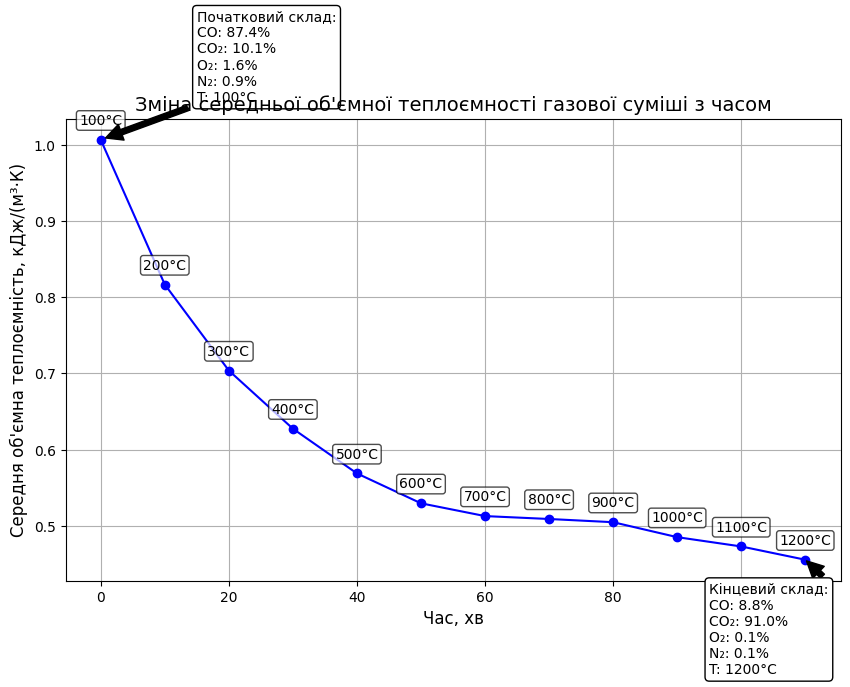

In [13]:
# Графік 1: Залежність теплоємності від часу
plt.figure(figsize=(10, 6))
plt.plot(times, heat_capacities, marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xlabel('Час, хв', fontsize=12)
plt.ylabel('Середня об\'ємна теплоємність, кДж/(м³·К)', fontsize=12)
plt.title('Зміна середньої об\'ємної теплоємності газової суміші з часом', fontsize=14)

# Додавання температур до першого графіку
for i, temp in enumerate(temperatures):
    plt.annotate(f'{temp}°C', xy=(times[i], heat_capacities[i]),
                 xytext=(times[i], heat_capacities[i] + 0.02),
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center')

# Додавання пояснень до першого графіку
plt.annotate(f'Початковий склад:\nCO: {co_percentages[0]}%\nCO₂: {co2_percentages[0]}%\nO₂: {o2_percentages[0]}%\nN₂: {n2_percentages[0]}%\nT: {temperatures[0]}°C',
             xy=(times[0], heat_capacities[0]), xytext=(times[0]+15, heat_capacities[0]+0.05),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f'Кінцевий склад:\nCO: {co_percentages[-1]}%\nCO₂: {co2_percentages[-1]}%\nO₂: {o2_percentages[-1]}%\nN₂: {n2_percentages[-1]}%\nT: {temperatures[-1]}°C',
             xy=(times[-1], heat_capacities[-1]), xytext=(times[-1]-15, heat_capacities[-1]-0.15),
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black", alpha=1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

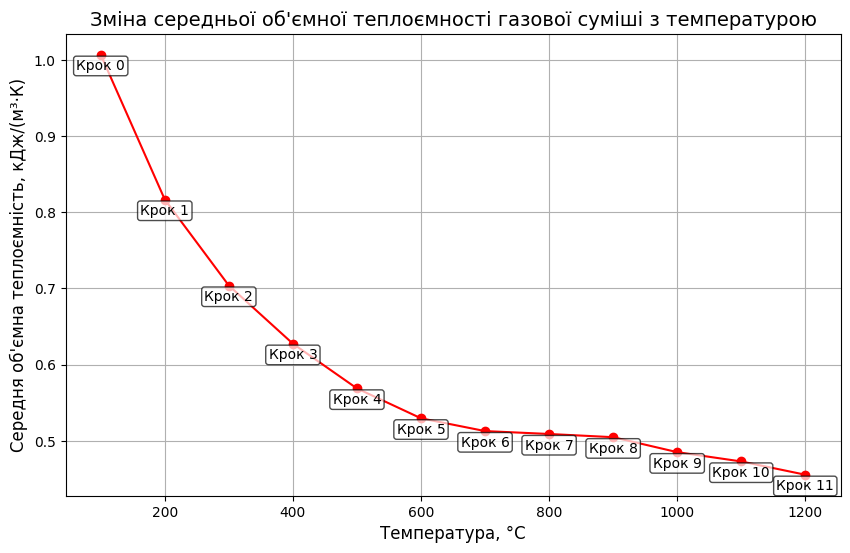

In [14]:
# Графік 2: Залежність теплоємності від температури
plt.figure(figsize=(10, 6))
plt.plot(temperatures, heat_capacities, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.xlabel('Температура, °C', fontsize=12)
plt.ylabel('Середня об\'ємна теплоємність, кДж/(м³·К)', fontsize=12)
plt.title('Зміна середньої об\'ємної теплоємності газової суміші з температурою', fontsize=14)

# Додавання номерів кроків до другого графіку
for i in range(steps):
    plt.annotate(f'Крок {i}', xy=(temperatures[i], heat_capacities[i]),
                 xytext=(temperatures[i], heat_capacities[i] - 0.02),
                 bbox=dict(boxstyle="round,pad=0.2", facecolor="white", edgecolor="black", alpha=0.7),
                 ha='center')


plt.show()

In [15]:
if len(heat_capacities) > 1:
    print("\nВисновки:")
    print(f"При зміні складу газової суміші та температури від початкового до кінцевого стану")
    print(f"середня об'ємна теплоємність змінюється з {heat_capacities[0]:.4f} до {heat_capacities[-1]:.4f} кДж/(м³·К).")
    print(f"Це зумовлено двома факторами:")
    print(f"1. Зміною складу суміші: збільшенням вмісту CO₂ з {co2_percentages[0]}% до {co2_percentages[-1]}%, який має вищу теплоємність порівняно з CO.")
    print(f"2. Зміною температури: з {temperatures[0]}°C до {temperatures[-1]}°C, що також впливає на теплоємність компонентів.")


Висновки:
При зміні складу газової суміші та температури від початкового до кінцевого стану
середня об'ємна теплоємність змінюється з 1.0068 до 0.4555 кДж/(м³·К).
Це зумовлено двома факторами:
1. Зміною складу суміші: збільшенням вмісту CO₂ з 10.1% до 91.0%, який має вищу теплоємність порівняно з CO.
2. Зміною температури: з 100°C до 1200°C, що також впливає на теплоємність компонентів.
